### Visualizing data from Daru containers
DARU (Data Analysis in RUby) is a library for storage, analysis, manipulation and visualization of data. You can find information about daru in its [repository](https://github.com/v0dro/daru).

GnuplotRB takes from Daru::Vector or Daru::DataFrame *name* as dataset's *title* and *index* column as *xtic*. Example:

In [1]:
require 'daru'
require 'gnuplotrb'
include GnuplotRB

df = Daru::DataFrame.new({
  Build: [312, 630, 315, 312],
  Test: [525, 1050, 701, 514],
  Deploy: [215, 441, 370, 220]
})
df[:Overall] = df[:Build] + df[:Test] + df[:Deploy]
df

,Build,Deploy,Test,Overall
0,312,215,525,1052
1,630,441,1050,2121
2,315,370,701,1386
3,312,220,514,1046


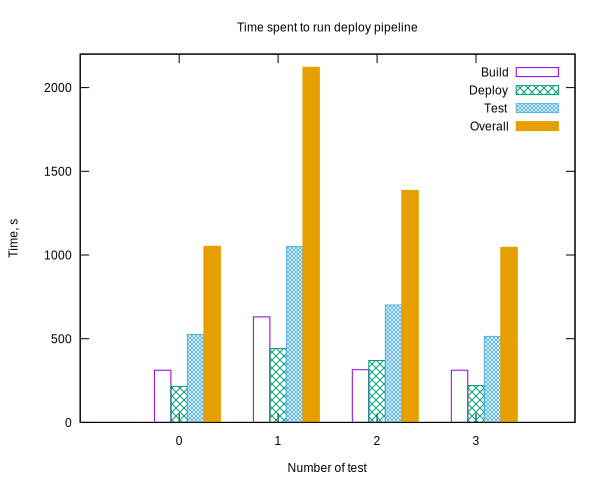

In [2]:
datasets = df.map { |column| Dataset.new(column) }

Plot.new(
    *datasets,
    style_data: 'histograms',
    style_fill: 'pattern border',
    yrange: 0..2200,
    xlabel: 'Number of test',
    ylabel: 'Time, s',
    title: 'Time spent to run deploy pipeline'
)

#### WIP